# Random Forests, the definition of insanity or an ingenious solution?

### By Keiron O'Shea, and Chuan Lu

![title](images/forest.jpeg)

A Random Forest is another form of ensemble learning in which individual decision trees are created. This forest of Decision Trees is then used to predict the output value. As to esnure diversity among various trees, a random subset of training data is taken to construct each Decision Tree.

## Overfitting, the data scientist's mortal enemy

This method has an added bonus of not overfitting. We've referred to overfitting a couple times now, but what exactly is it - and why should we care? An overfit model can be described as being "too complicated" for the dataset. When this happens our model becomes too tailored to fit the random noise in our dataset - rather than being generalistic enough to model the likely inputs. In other words, our model should not fit only to the current set of training samples - but new samples too.

<img src="images/overfitting.png" width="400">

"The green line represents an overfitted model and the black line represents a regularized model. While the green line best follows the training data, it is too dependent on that data and it is likely to have a higher error rate on new unseen data, compared to the black line." - Taken from https://en.wikipedia.org/wiki/Overfitting

During creation nodes are split successively and the best performing nodes are chosen to reduce the entropy at each level. These splits do not consider all of the features passed, instead selecting the best split among the subset of the features that are under consideration. Adding randomness tends to bias the entire forest, but variance decreases due to averaging.

## Diagnosing Colon Cancer from Microarray data

Over the past two decades, Microarray technology has attracted increasing interest in many academic communities. This breakthrough in short read sequencing technology promises a new insight into the mechanisms of life by providing a way to simultaneously measure the activities and interaction of thousands of genes. For example, obtaining genome-wide ex-pression data from cancerous tissues provides clues for cancer classification and accurate diagnostic tests. However cancer classification remains a challenge to computer scientists. The main difficulties lie in the nature of the microarray gene expression data, which suffers from high-dimensionality and high-levels of noise.

![title](images/Microarray.gif)

In this workshop, we have provided you with some Microarray data taken from an extensive study of patients suffering from varying stages of colon cancer (Zexuan Zhu, Y. S. Ong and M. Dash, “Markov Blanket-Embedded Genetic Algorithm for Gene Selection”, Pattern Recognition, Vol. 49, No. 11, 3236-3248, 2007).

Before we start, you need to import **pandas as pd** and **json**.

In [1]:
# Type your imports go here
import pandas as pd
import json

## Conversion from Weka ARFF to Pandas DataFrame

Unfortunately, the data was provided in the form of a Weka ```ARFF``` file. Below you can find a quick hack to convert the ```ARFF``` data into a ```pandas DataFrame```.

In [2]:
arff_file = open("./data/Colon.arff", "r").readlines()

columns = []
data = []

for index, line in enumerate(arff_file):
    #collect all attributes
    if line.startswith("@ATTRIBUTE"):
        columns.append(line.split(" ")[1])
    #collect all data for each attribute
    if line.startswith("@DATA"):
        for d in arff_file[index+1:]:
            data.extend([d.replace("\n", "").split(",")])
        break

colon_df = pd.DataFrame(data, columns=columns)
# Drop Controls
colon_df = colon_df[[x for x in columns if x != "control"]]

# Gene Information
with open("./data/gene.json", "r") as infile:
    gene_dict = json.load(infile)

It's important that you understand how best to deal with "unknown" data. The only tips I will give you is that the index is a range of n length (where n is equal to the number of patients) and the final column contains the classification label. You can use the following code cell to have a play around with the ```DataFrame``` if you so please:

**Note:** I've also added descriptions for all of the localised genes, and provided them in a python dictonary named ```gene_dict```. If you have time, use this file for further inference of your results.

In [3]:
colon_df.head()

,H55933,R39465,R39465,R39465,R39465,R85482,U14973,R02593,R02593,T51496,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,class
0,8589.416,5468.2407,4263.4077,5468.2407,4263.4077,4064.9358,1997.893,5282.325,2365.2424,2169.72,...,67.56125,259.9125,138.89874,88.2325,39.66786,67.82875,75.6775,83.5225,28.70125,Tumor
1,9164.254,6719.5293,4883.4487,6719.5293,4883.4487,3718.159,2015.2214,5569.907,2865.0388,3849.0588,...,92.23875,96.27625,150.59,82.2375,85.03333,152.195,186.5675,44.4725,16.77375,Normal
2,3825.705,6970.3613,5369.9688,6970.3613,5369.9688,4705.65,1166.5536,1572.1678,763.3075,1325.4025,...,82.715,31.1025,193.92,76.9725,224.62024,31.225,42.65625,16.0925,15.15625,Tumor
3,6246.4487,7823.534,5955.835,7823.534,5955.835,3975.5642,2002.6132,2130.543,969.8237,1531.1425,...,41.68375,5.925,183.00626,74.52875,67.71072,48.33875,42.52,49.9825,16.085,Normal
4,3230.3286,3694.45,3400.74,3694.45,3400.74,3463.5857,2181.4202,2922.782,1568.1113,2069.2463,...,76.60375,161.35,61.70125,54.56375,223.35953,73.09875,57.59875,7.48875,31.8125,Tumor


Now, you are tasked with the following:

- Split the data up into ```training``` and ```testing``` sets.
- Create a Random Forest Classifier to fit the training data.
- Evaluate the Random Forest Classifier using appropriate forms of metrics.

Here are some links that should help guide you with this task:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Take a look at hyperparameters such as ```n_estimators``` and ```min_samples_split``` to get a better understanding as to how Random Forests work.  
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split



If you are struggling to do this, take a look back at last weeks workshop for assistance. If you're still unable to complete the task, feel free to call a demonstrator over for additional help.

In [4]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#split data frame into input(x) and labels(y)
#data from first n-1 features/columns are input
X = colon_df.values[:,:-1]
#data from last feature/column are labels
y = colon_df["class"].values

#check equal samples in x and y - sanity check
if X.shape[0] != y.shape[0]:
    raise Exception("Sample counts do not align! Try again!")

#split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#create classifier
clf = RandomForestClassifier(n_estimators=100)

#train classifier
clf = clf.fit(X_train, y_train)

#make predictions for the test set
test_y_predictions = clf.predict(X_test)

#get confusion matrix of model 
print(confusion_matrix(y_test, test_y_predictions))




[[2 5]
 [0 6]]


In [5]:
from sklearn.metrics import accuracy_score
#accuracy = tp+tn / p+n
print(accuracy_score(y_test, test_y_predictions))

0.6153846153846154


In [6]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, test_y_predictions))

(array([1.        , 0.54545455]), array([0.28571429, 1.        ]), array([0.44444444, 0.70588235]), array([7, 6], dtype=int64))


And we can now visualise the trees using the following method, please take your time to understand what it does and how it does it. If you want to hack at it, a suggestion would be to save the files in a directory - as opposed to struggle with the sheer size of it within the ```notebook```:

In [7]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG

#"C:\Program Files (x86)\graphviz-2.38\bin"
#import os
#os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\graphviz-2.38\bin"

def visualise_forest_of_trees(classifier):
    for index, tree in enumerate(classifier.estimators_):
        dot = export_graphviz(tree, filled=True, rounded=True)
        graph = graphviz.Source(dot)
        display(SVG(graph.pipe(format="svg")))
        if index > 5:
            break

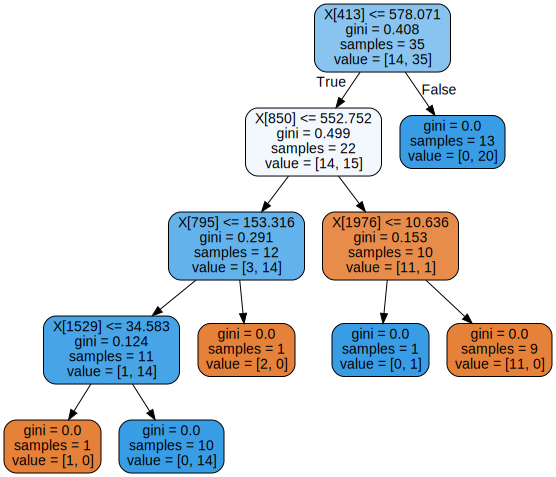

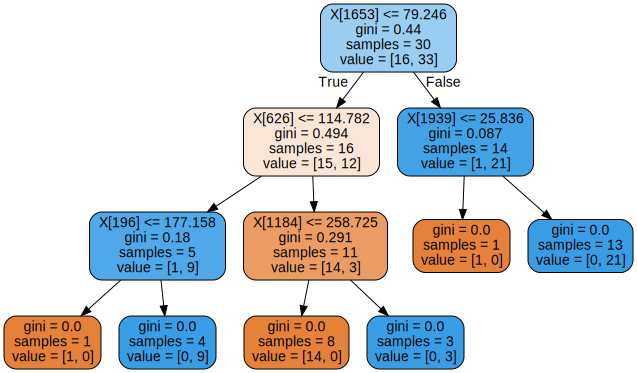

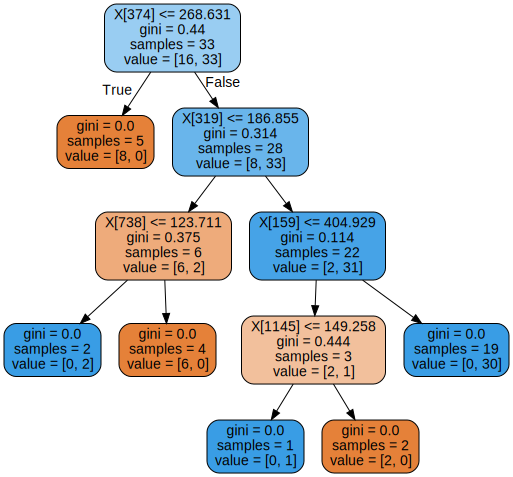

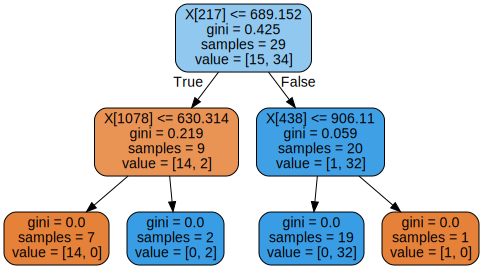

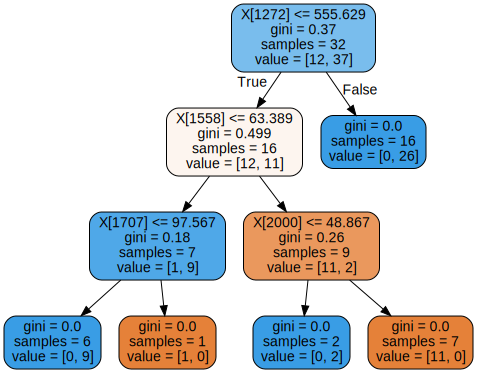

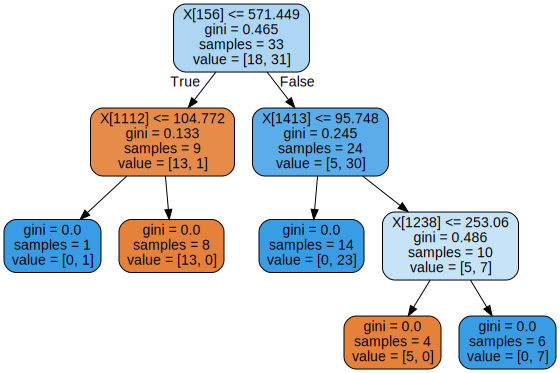

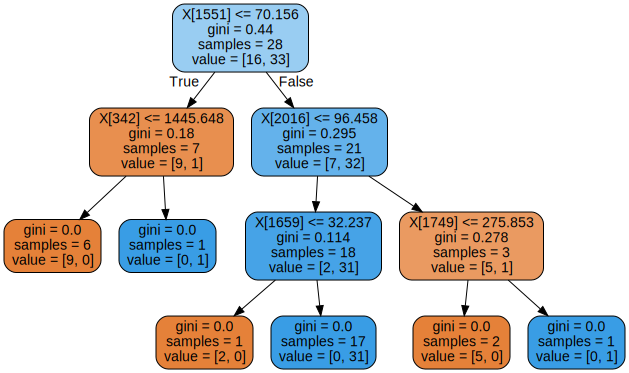

In [8]:
# Your code here -call function
visualise_forest_of_trees(clf)

## Hyperparameter selection using GridSearch

According to Wikipedia;

"The traditional way of performing hyperparameter optimisation has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set."

When tasked with building classifiers, it is not always possible to know what the best parameters are. It is not feasible to "brue-force" parameters manually, so we make use of grid search. Grid Search provides us the abilit to specify a range of values from which classifiers can be built and evaluated using to find out the best combintation of parameters.

So, to do this - we will first set up a couple imports and variables: 

In [9]:
from sklearn.model_selection import GridSearchCV

# These aren't real metrics, you can try using something like accuracy if you're struggling to find 
# relevant documentation
metrics = ["accuracy", "precision", "recall"]

parameters = {"n_estimators" : [1, 10, 50, 100], "max_depth" : [2, 4, 8]}


Study the above carefully, look at the parameters dictonary and extend them.


Using the following **pseudocode** as a base, write something that will detail the best performing parameters:

```
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for metric in metrics:
    clf = GridSearchCV(Classifier, parameter_grid, cv=10, scoring=metric)
    clf.fit(X_train, y_train)
    # There is no such thing as grid_scores. Please read relevant documentation and
    # find how to get best scores/estimatores.
    for params, avg_score, _ in clf.grid_scores_:
            print(params, round(avg_score, 3)
    
    clf = clf.best_params_
    # Get predicted values
    classification_report(y_test, y_pred)

```

Here's the documentation for GridSearchCV.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [15]:
import time

# tune the hyperparameters via a cross-validated grid search
print("[INFO] tuning hyperparameters via grid search")
model = RandomForestClassifier(n_estimators=100)
grid = GridSearchCV(model, parameters) #GridSearchCV(clf, parameters, cv=10, scoring="accuracy")
start = time.time()
grid.fit(X_train, y_train)
# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(
	time.time() - start))
acc = grid.score(X_test, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(
	grid.best_params_))

#print(grid.cv_results_)

[INFO] tuning hyperparameters via grid search
[INFO] grid search took 10.69 seconds
[INFO] grid search accuracy: 61.54%
[INFO] grid search best parameters: {'max_depth': 4, 'n_estimators': 50}


In [ ]:
#grid_mean_scores = [result.mean_validation_score for result in gsc.cv_results_]
#print(grid_mean_scores)

If you have time, try last weeks data (danio_rerio.csv) and see how the performance fares against last weeks benchmark.